# Saneamento Teresina-PI

-- Os Dados usados nesse breve estudo São públicos , e estão disponíveis para consulta ! 

Convênios e outros acordos  (09 - 19)
http://www.portaltransparencia.gov.br/convenios/consulta?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&periodoLiberacaoRecursosDe=01%2F01%2F2009&periodoLiberacaoRecursosAte=30%2F11%2F2019&periodoVigenciaDe=01%2F01%2F2009&periodoVigenciaAte=30%2F11%2F2019&uf=PI&municipio=21280&funcaoSubfuncao=SB512&colunasSelecionadas=linkDetalhamento%2CnumeroConvenio%2CnumeroOriginal%2Cuf%2CmunicipioConvenente%2Csituacao%2CtipoTransferencia%2Cobjetivo%2CorgaoSuperior%2Corgao%2Cconcedente%2Cconvenente%2CdataInicioVigencia%2CdataFimVigencia%2CvalorCelebrado&ordenarPor=orgao&direcao=desc

Emendas(09 - 19)
http://www.portaltransparencia.gov.br/emendas/consulta?ordenarPor=localidadeDoGasto&direcao=asc

Transferências(09 - 19)
http://www.portaltransparencia.gov.br/transferencias/consulta?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&de=01%2F01%2F2009&ate=30%2F11%2F2019&uf=PI&municipio=21280&funcao=17&colunasSelecionadas=linkDetalhamento%2Cuf%2Cmunicipio%2Ctipo%2CtipoFavorecido%2Cacao%2ClinguagemCidada%2CgrupoDespesa%2CelementoDespesa%2CmodalidadeDespesa%2Cvalor&ordenarPor=mesAno&direcao=desc

In [2]:
import pandas as pd  

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

- Importamos Todos os DataSets

In [5]:
conv_df = pd.read_excel("convenio.xlsx") # Dados de 2009 ~ 2019 

In [6]:
transf_df = pd.read_excel("transferencia.xlsx")  # Dados de 2009 ~ 2019 

In [7]:
emen_df = pd.read_excel("emendaspi.xlsx") # Dados de 2009 ~ 2019 

- Iniciando pelo menor DataSet

In [8]:
emen_df # Emendas - A emenda parlamentar é o instrumento que o Congresso Nacional possui para participar da elaboração do orçamento anual.

,Ano,Nome do autor,Número da emenda,Localidade do gasto (Regionalização),Função,Subfunção,Valor empenhado,Valor liquidado,Valor pago
0,2016,PAES LANDIM,3,PIAUÍ,Saúde,Saneamento básico urbano,300000,0,0
1,2016,REGINA SOUSA,16,PIAUÍ,Saúde,Saneamento básico urbano,1065806,0,0
2,2017,PAES LANDIM,3,PIAUÍ,Saúde,Saneamento básico urbano,1200000,0,0
3,2017,REGINA SOUSA,17,PIAUÍ,Saúde,Saneamento básico urbano,1600000,0,0
4,2018,PAES LANDIM,6,PIAUÍ,Saúde,Saneamento básico urbano,1981136,8730,8730
5,2016,REGINA SOUSA,1,PIAUÍ,Saúde,Saneamento básico urbano,2131612,0,0
6,2016,SILAS FREIRE,3,PIAUÍ,Saúde,Saneamento básico urbano,2322870,0,0
7,2018,ATILA LIRA,6,PIAUÍ,Saúde,Saneamento básico urbano,2600000,9000,9000


- Buscando algumas Informações, referente às caracteristicas do DataSet

In [9]:
emen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
Ano                                     8 non-null int64
Nome do autor                           8 non-null object
Número da emenda                        8 non-null int64
Localidade do gasto (Regionalização)    8 non-null object
Função                                  8 non-null object
Subfunção                               8 non-null object
Valor empenhado                         8 non-null int64
Valor liquidado                         8 non-null int64
Valor pago                              8 non-null int64
dtypes: int64(5), object(4)
memory usage: 704.0+ bytes


- O empenho da despesa é um ato administrativo. Isto significa que o empenho em si não cria a obrigação de pagamento, ou seja, não gera um passivo em termos patrimoniais. Assim, a obrigação de pagamento só surge após a etapa da liquidação (segunda etapa da execução orçamentária da despesa). 

In [10]:
total_emp_emen = emen_df['Valor empenhado'].sum() 

In [11]:
total_emp_emen # Valor em Reais 

13201424

- Empenhos em Forma de Histograma

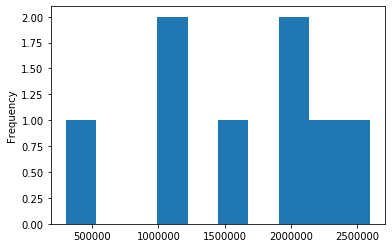

In [12]:
emen_df['Valor empenhado'].plot.hist()

- liquidação é quando se verifica que o governo recebeu aquilo que comprou. Ou seja, quando se confere que o bem foi entregue corretamente ou que a etapa da obra foi concluída como acordado.

In [13]:
total_liq_emen = emen_df['Valor liquidado'].sum()

In [14]:
total_liq_emen # Valor em Reais R$

17730

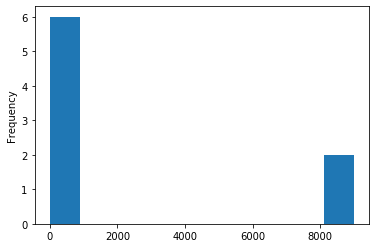

In [15]:
emen_df['Valor liquidado'].plot.hist()

In [16]:
dif_liqxemp_emen = total_liq_emen - total_emp_emen

In [17]:
dif_liqxemp_emen

-13183694

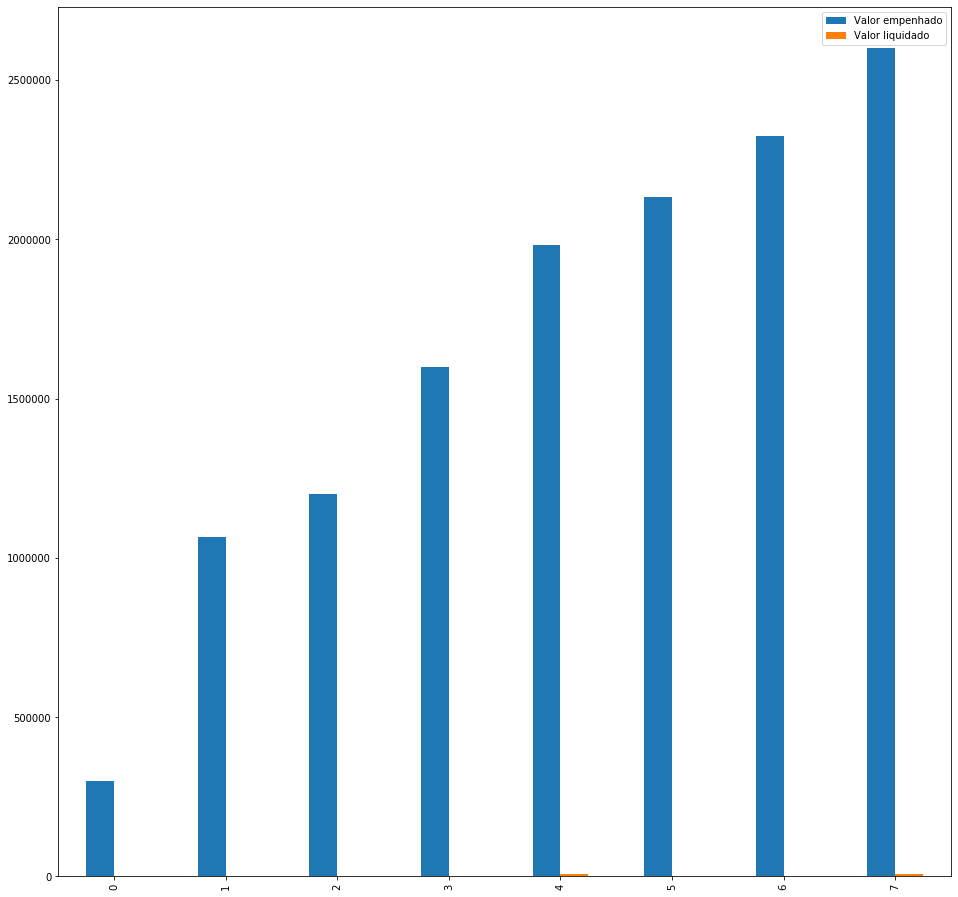

In [18]:
plo = emen_df[["Valor empenhado","Valor liquidado"]].plot(figsize=(16,16),kind = 'bar')

. Para vizualizar melhor temos a comparação dos dados , do dinheiro empenhado e do total liquidado, ou seja:
 Em AZUL temos tudo aquilo que foi solicitada e(ou) separado para a realização do invetimento público e em LARANJA ,
 tudo aquilo que realmente foi aplicado.
 

[17730.0, 13201424.0]
['Valor Liquidado', 'Valor empenhado']


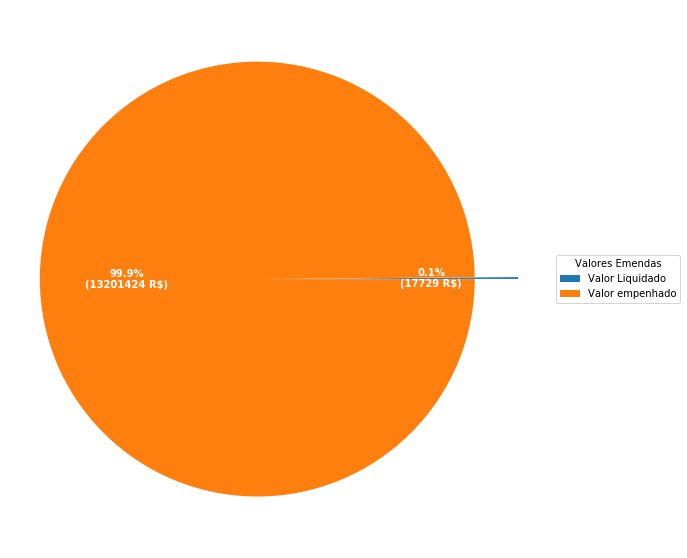

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 10), subplot_kw=dict(aspect="equal"))

recipe = ["17730 R$. Valor Liquidado",
          "13201424 R$. Valor empenhado"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [' '.join(x.split()[2:]) for x in recipe]

print(data)
print(ingredients)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} R$)".format(pct, absolute)

explode = np.empty(len(data))
explode.fill(0.1)

wedges, texts, autotexts = ax.pie(data, explode=explode, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          title="Valores Emendas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

plt.show()

- Convênio administrativo, na administração pública brasileira,
se refere a acordos firmados entre uma entidade da administração
pública federal e uma entidade pública estadual, distrital ou 
municipal da administração direta ou indireta ou entidades
particulares sem fins lucrativos, para realização de objetivos 
de interesse comum entre os participantes (chamados de partícipes)

In [36]:
conv_df

,Número,Número Original,UF,Município,Situação,Tipo de Instrumento,Objeto,Órgão Superior,Órgão/Entidade vinculada,Concedente,Convenente,Data de início da vigência,Data de fim da vigência,Valor Celebrado (R$)
0,593585,CR.NR.0218090-94,PI,TERESINA,INADIMPLÊNCIA SUSPENSA,CONTRATO DE REPASSE,INTERVENCAO NOS SISTEMAS DE ABASTECIMENTO DE A...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-09-10,2017-05-08,24935041.80
1,607517,CR.NR.0237817-77,PI,TERESINA,CONCLUÍDO,CONTRATO DE REPASSE,AMPLIACAO DE SISTEMA ABASTECIMENTO DE AGUA DE ...,Ministério das Cidades,Ministério das Cidades - Unidades com vínculo ...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-12-24,2017-06-30,5579200.00
2,607518,CR.NR.0238154-82,PI,TERESINA,CONCLUÍDO,CONTRATO DE REPASSE,AMPLIACAO DO SISTEMA DE ABASTECIMENTO DE AGUA ...,Ministério das Cidades,Ministério das Cidades - Unidades com vínculo ...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-12-24,2017-03-30,6110062.01
3,648108,TC/PAC 0603/08,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2017-03-03,402490.99
4,649609,TC/PAC 0642/08,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE AGUA MUNICIPIO D...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2015-01-06,400000.00
5,649621,TC/PAC 0604/08,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE AGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2015-10-20,400000.00
6,658222,TC/PAC 0333/09,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-06-09,374473.32
7,658549,TC/PAC 0866/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUÇÃO DE SISTEMA DE ABASTECIMENTO DE ÁGUA P...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-05-05,800000.00
8,658552,TC/PAC 0315/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUCAO DE SISTEMAS DE ABASTECIMENTO DE ÁGUA ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2015-12-15,500000.00
9,658562,TC/PAC 0327/09,PI,TERESINA,CONCLUÍDO,Sem informação,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2015-10-16,379500.87


- Buscando Algumas informações sobre o Novo DataSet

In [38]:
conv_df.info() # Novamente as informações do DataSet Escolhido

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 14 columns):
Número                        35 non-null int64
Número Original               35 non-null object
UF                            35 non-null object
Município                     35 non-null object
Situação                      35 non-null object
Tipo de Instrumento           35 non-null object
Objeto                        35 non-null object
Órgão Superior                35 non-null object
Órgão/Entidade vinculada      35 non-null object
Concedente                    35 non-null object
Convenente                    35 non-null object
Data de início da vigência    35 non-null datetime64[ns]
Data de fim da vigência       35 non-null datetime64[ns]
Valor Celebrado (R$)          35 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 4.0+ KB


In [40]:
total_conv_ = conv_df['Valor Celebrado (R$)'].sum() 

In [41]:
total_conv_ 

235068934.16

In [43]:
total_Conclu=conv_df.loc[conv_df['Situação']=='CONCLUÍDO']  # Criando um dataFrame só com os covênios concluídos

In [44]:
total_Conclu #exibindo

,Número,Número Original,UF,Município,Situação,Tipo de Instrumento,Objeto,Órgão Superior,Órgão/Entidade vinculada,Concedente,Convenente,Data de início da vigência,Data de fim da vigência,Valor Celebrado (R$)
1,607517,CR.NR.0237817-77,PI,TERESINA,CONCLUÍDO,CONTRATO DE REPASSE,AMPLIACAO DE SISTEMA ABASTECIMENTO DE AGUA DE ...,Ministério das Cidades,Ministério das Cidades - Unidades com vínculo ...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-12-24,2017-06-30,5579200.00
2,607518,CR.NR.0238154-82,PI,TERESINA,CONCLUÍDO,CONTRATO DE REPASSE,AMPLIACAO DO SISTEMA DE ABASTECIMENTO DE AGUA ...,Ministério das Cidades,Ministério das Cidades - Unidades com vínculo ...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2007-12-24,2017-03-30,6110062.01
9,658562,TC/PAC 0327/09,PI,TERESINA,CONCLUÍDO,Sem informação,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2015-10-16,379500.87
15,670817,CR.NR.0351127-34,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,Elaboracao de Estudo de concepcao e Projeto de...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2011-09-12,2018-12-31,3011129.00
17,670945,CR.NR.0351316-23,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,Elaboracao do Plano Municipal de Saneamento Am...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,MUNICIPIO DE TERESINA,2011-07-12,2018-12-19,2000000.00
20,671391,CR.NR.0350865-53,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,Ampliacao do Sistema de Esgotamento sanitario ...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2011-10-24,2017-06-30,11390000.00
24,673843,CR.NR.0402547-00,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,Elaboracao de estudos e projetos de engenharia...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,MUNICIPIO DE TERESINA,2012-12-21,2019-05-19,1250000.00
28,673864,CR.NR.0402537-86,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,Elaboracao de estudos e projetos de engenharia...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,MUNICIPIO DE TERESINA,2012-12-21,2019-05-19,3125000.00
30,676813,CR.NR.0408668-02,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,MELHORIA E REFORCO DO SISTEMA DE ABASTECIMENTO...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,MUNICIPIO DE TERESINA,2013-08-20,2018-12-19,5814454.14
31,676853,CR.NR.0408711-30,PI,TERESINA,CONCLUÍDO,TERMO DE COMPROMISSO,AMPLIACAO DO SISTEMA DE ESGOTAMENTO SANITARIO ...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,MUNICIPIO DE TERESINA,2013-08-20,2018-12-19,8768395.28


In [46]:
valor_cele_Conclu=total_Conclu['Valor Celebrado (R$)'].sum() #Somando o valor celebrado dos Covênios Concluídos

In [47]:
valor_cele_Conclu #Valor em reais

47427741.3

In [48]:
total_adim=conv_df.loc[conv_df['Situação']=='ADIMPLENTE'] # Criando um dataFrame só com os covênios Adimplentes

In [49]:
total_adim

,Número,Número Original,UF,Município,Situação,Tipo de Instrumento,Objeto,Órgão Superior,Órgão/Entidade vinculada,Concedente,Convenente,Data de início da vigência,Data de fim da vigência,Valor Celebrado (R$)
5,649621,TC/PAC 0604/08,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE AGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2015-10-20,400000.00
7,658549,TC/PAC 0866/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUÇÃO DE SISTEMA DE ABASTECIMENTO DE ÁGUA P...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-05-05,800000.00
8,658552,TC/PAC 0315/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUCAO DE SISTEMAS DE ABASTECIMENTO DE ÁGUA ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2015-12-15,500000.00
10,659258,TC/PAC 0321/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,EXECUCAO DE SISTEMAS DE ABASTECIMENTO DE AGUA ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-07-09,2000000.00
11,660237,TC/PAC 0163/09,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2016-05-15,384155.86
12,666749,CR.NR.0339073-43,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,IMPLANTACAO DE SISTEMA DE MACRODRENAGEM EM OEIRAS,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2010-12-31,2019-12-31,23749010.90
13,669499,TC/PAC 0487/11,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ESGOTAMENTO SANITÁRIO.,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2011-12-21,2020-06-14,7515357.15
14,669501,TC/PAC 0503/11,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ESGOTAMENTO SANITÁRIO.,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2011-12-21,2018-12-21,7972773.21
16,670829,CR.NR.0351063-76,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,Elaboracao de Projeto para Ampliacao e Melhori...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,ESTADO DO PIAUI,2011-09-12,2019-12-31,2190658.00
18,670970,CR.NR.0351004-58,PI,TERESINA,ADIMPLENTE,TERMO DE COMPROMISSO,DRENAGEM URBANA GALERIAS PLUVIAIS ZONA LES...,Ministério do Desenvolvimento Regional,Ministério do Desenvolvimento Regional - Unida...,CAIXA ECONOMICA FEDERAL - PROGRAMAS SOCIAIS,MUNICIPIO DE TERESINA,2011-05-25,2019-12-19,16252727.59


In [50]:
valor_cele_adim=total_adim['Valor Celebrado (R$)'].sum() #Somando o valor celebrado dos Covênios Adimplentes

In [51]:
valor_cele_adim # Valor em Reais R$

145449257.84

In [52]:
total_inadim=conv_df.loc[conv_df['Situação']=='INADIMPLENTE'] # Criando um dataFrame só com os covênios Inadimplentes

In [53]:
total_inadim

,Número,Número Original,UF,Município,Situação,Tipo de Instrumento,Objeto,Órgão Superior,Órgão/Entidade vinculada,Concedente,Convenente,Data de início da vigência,Data de fim da vigência,Valor Celebrado (R$)
3,648108,TC/PAC 0603/08,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2017-03-03,402490.99
4,649609,TC/PAC 0642/08,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE AGUA MUNICIPIO D...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2008-12-31,2015-01-06,400000.00
6,658222,TC/PAC 0333/09,PI,TERESINA,INADIMPLENTE,TERMO DE COMPROMISSO,SISTEMA DE ABASTECIMENTO DE ÁGUA PARA ATENDER ...,Ministério da Saúde,Fundação Nacional de Saúde,FUNDACAO NACIONAL DE SAUDE - DF,ESTADO DO PIAUI,2009-12-31,2017-06-09,374473.32


In [54]:
valor_cele_inadim=total_inadim['Valor Celebrado (R$)'].sum() #Somando o valor celebrado dos Covênios Inadimplentes

In [55]:
valor_cele_inadim #Valor Em Reais R$

1176964.31

[47427741.3, 145449257.84, 1176964.31, 16079928.91, 24935041.8]
['Convênios Concluídos', 'Convênios Adimplentes', 'Convênios Inadimplentes', 'Covênio em Execução', 'Inadimplência Suspensa']


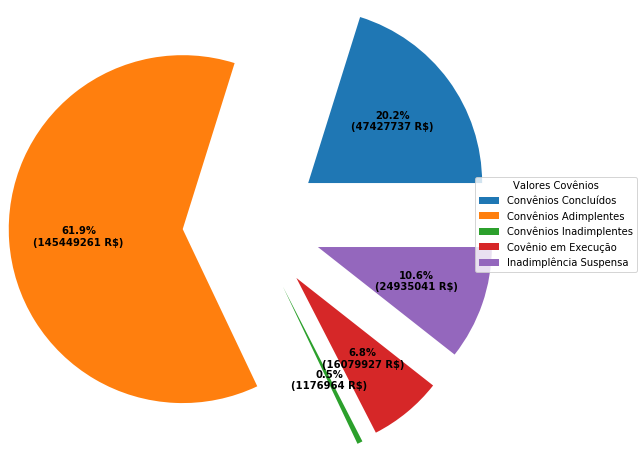

In [74]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8), subplot_kw=dict(aspect="equal"))

recipe = ["47427741.30 R$. Convênios Concluídos",
          "145449257.84 R$. Convênios Adimplentes",
         "1176964.31 R$. Convênios Inadimplentes",
         "16079928.91 R$. Covênio em Execução",
         "24935041.80 R$. Inadimplência Suspensa"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [' '.join(x.split()[2:]) for x in recipe]

print(data)
print(ingredients)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} R$)".format(pct, absolute)

explode = np.empty(len(data))
explode.fill(0.4)

wedges, texts, autotexts = ax.pie(data, explode=explode, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="k"))
ax.legend(wedges, ingredients,
          title="Valores Covênios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

plt.show()

. Ou seja, a União transfere recursos para os estados e municípios e os estados transferem recursos para os municípios.

In [75]:
transf_df

,Tipo,Ação Orçamentária,Linguagem Cidadã,Tipo de Favorecido,UF,Município,Valor Transferido
0,"Legais, Voluntárias e Específicas","1N08 - APOIO A IMPLANTACAO, AMPLIACAO OU MELHO...",Sem informação,Administração Pública Municipal,PI,TERESINA,585999.91
1,"Legais, Voluntárias e Específicas","10SC - APOIO A IMPLANTACAO, AMPLIACAO OU MELHO...",Sem informação,Administração Pública Municipal,PI,TERESINA,1614970.16
2,"Legais, Voluntárias e Específicas","10SC - APOIO A IMPLANTACAO, AMPLIACAO OU MELHO...",Sem informação,Administração Pública Estadual ou do Distrito ...,PI,TERESINA,1773766.74
3,"Legais, Voluntárias e Específicas",1P95 - APOIO A ELABORACAO DE PLANOS E PROJETOS...,Sem informação,Administração Pública Estadual ou do Distrito ...,PI,TERESINA,1935464.01
4,"Legais, Voluntárias e Específicas",10S5 - APOIO A EMPREENDIMENTOS DE SANEAMENTO I...,Sem informação,Administração Pública Municipal,PI,TERESINA,6219844.88
5,"Legais, Voluntárias e Específicas",10SG - APOIO A SISTEMAS DE DRENAGEM URBANA SUS...,Sem informação,Administração Pública Municipal,PI,TERESINA,13438417.47
6,"Legais, Voluntárias e Específicas",141J - LIGACOES INTRADOMICILIARES DE ESGOTOS S...,Sem informação,Administração Pública Estadual ou do Distrito ...,PI,TERESINA,14739470.04
7,"Legais, Voluntárias e Específicas",10SG - APOIO A SISTEMAS DE DRENAGEM URBANA SUS...,Sem informação,Administração Pública Estadual ou do Distrito ...,PI,TERESINA,16714510.45
8,"Legais, Voluntárias e Específicas","1N08 - APOIO A IMPLANTACAO, AMPLIACAO OU MELHO...",Sem informação,Administração Pública Estadual ou do Distrito ...,PI,TERESINA,16914715.62
9,"Legais, Voluntárias e Específicas",1P95 - APOIO A ELABORACAO DE PLANOS E PROJETOS...,Sem informação,Administração Pública Municipal,PI,TERESINA,18151506.30


In [76]:
total_tranf=transf_df['Valor Transferido'].sum()

In [77]:
total_tranf # Valor em Reais R$

92088665.58

In [78]:
total_em_dezy = [(total_liq_emen)+(valor_cele_Conclu)+(total_tranf)]

In [79]:
total_em_dezy #Valor em Reais R$

[139534136.88]

[47427741.3, 92088665.58, 17730.0]
['Convênios', 'Transferências', 'Emendas']


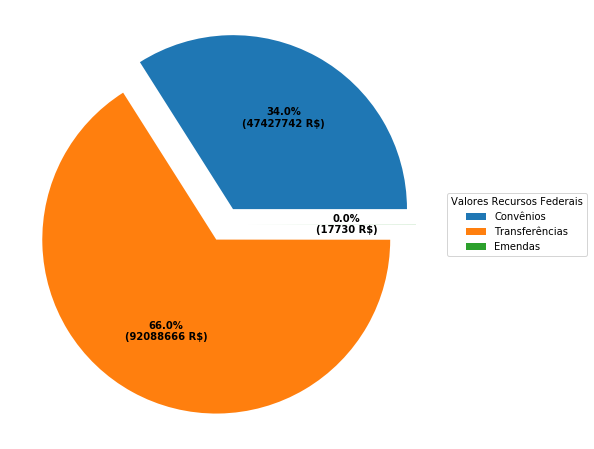

In [83]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8), subplot_kw=dict(aspect="equal"))

recipe = ["47427741.30 R$. Convênios ",
          "92088665.58 R$. Transferências",
         "17730 R$. Emendas"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [' '.join(x.split()[2:]) for x in recipe]

print(data)
print(ingredients)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} R$)".format(pct, absolute)

explode = np.empty(len(data))
explode.fill(0.1)

wedges, texts, autotexts = ax.pie(data, explode=explode, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="k"))
ax.legend(wedges, ingredients,
          title="Valores Recursos Federais",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

plt.show()

# Mediante os dados podemos concluir que a modalidade em que há mais aplicabilidade dos recusos financeiros federais,entre os anos de (2009 -2019)para o Sanemento na cidade de Teresina-PI são as TRANSFERÊNCIAS .